In [104]:
import numpy as np
import seaborn as sea
import plotly.express as px
import matplotlib.pyplot as plt
from   sklearn.base          import TransformerMixin
from   sklearn.decomposition import PCA
from   sklearn.datasets      import make_classification

In [105]:
def Plot(X,y):
    plt.figure(figsize=(5,4))
    sea.scatterplot(x=X[:,0],y=X[:,1],hue=y)
    plt.show()

In [106]:
data = make_classification(n_samples=1000,n_features=4,random_state=30)
X = data[0]
y = data[1]

In [107]:
fig = px.scatter_3d(z=X[:,0], x=X[:,1], y=X[:,2],color=y)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [108]:
pca = PCA(n_components=2)
xt = pca.fit_transform(X[:,0:3])

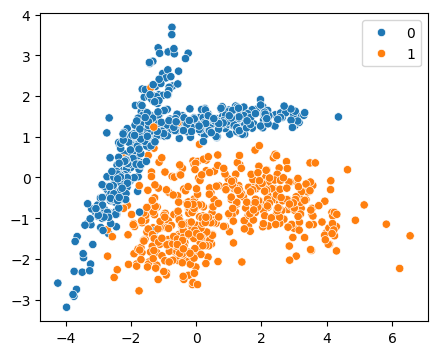

In [109]:
Plot(xt,y)

In [130]:
pca.components_,pca.explained_variance_ratio_

(array([[-0.75024736,  0.30320323, -0.58753442],
        [ 0.01174244, -0.88239471, -0.47036336]]),
 array([0.68715535, 0.31284465]))

In [131]:
np.sum(pca.explained_variance_ratio_)

1.0

In [127]:
class Projecao(TransformerMixin):
    components_ = None
    def __init__(self,type:['PCA']='PCA',components=2):
        self.type       = type
        self.components = components
    
    def fit(self,X,y=None):
        return self
    
    def transform(self, X, y=None):
        X_centro =  X - X.mean(axis=0)
        U, s, Vt = np.linalg.svd(X_centro)
        
        self.components_ = [Vt.T[:,i] for i in range(self.components)]
        
        return X_centro.dot(Vt.T[:,:self.components])

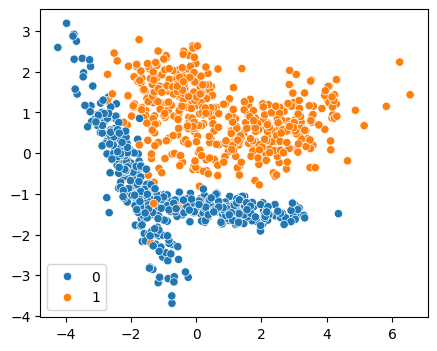

In [128]:
proj = Projecao(components=2)
d = proj.fit_transform(X[:,0:3])
Plot(d,y)

In [129]:
proj.components_

[array([-0.75024736,  0.30320323, -0.58753442]),
 array([-0.01174244,  0.88239471,  0.47036336])]

### Escolhendo dimensao

In [138]:
pca = PCA()
pca.fit(X)
np.argmax(np.cumsum(pca.explained_variance_ratio_)>=0.95)+1

2

### compactacao

In [141]:
from sklearn.datasets import fetch_openml
data = fetch_openml('mnist_784',version=1)

/home/mateus/Documentos/pythonVirtual/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning:

The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.



In [145]:
X = Xold = data['data']
y = data['target']

In [146]:
pca = PCA(n_components=150)
X = pca.fit_transform(X)

In [147]:
Xc = pca.inverse_transform(X)

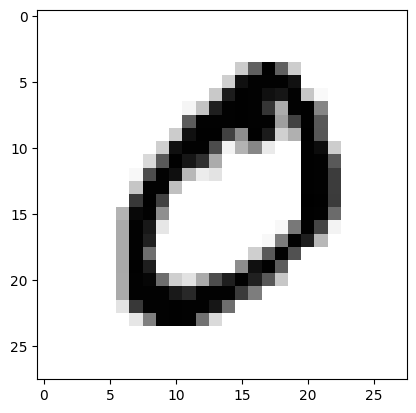

In [175]:
plt.imshow(Xold.iloc[1,:].values.reshape(28,28),cmap='binary')
plt.show()

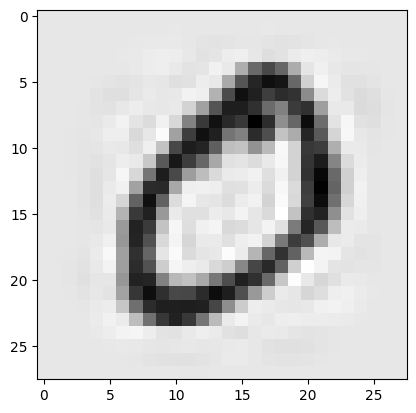

In [180]:
plt.imshow(Xc[1,:].reshape(28,28),cmap='binary')
plt.show()